In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
import contextily as ct
import xarray as xr
import numpy as np


In [3]:
# import requests
#
# url = "https://www.ncei.noaa.gov/thredds/fileServer/noaa-global-temp-v6/NOAAGlobalTemp_v6.0.0_gridded_s185001_e202508_c20250909T092005.nc"
# output = "NOAAGlobalTemp_v6.nc"
#
# with requests.get(url, stream=True) as r:
#     r.raise_for_status()
#     with open(output, "wb") as f:
#         for chunk in r.iter_content(chunk_size=8192):
#             f.write(chunk)
#
# print("Saved as", output)
# import xarray as xr
#
# ds = xr.open_dataset("NOAAGlobalTemp_v6.nc")
# print(ds)


In [4]:
# %% Load datasets
# NOAA ERSSTv5 (absolute SST)
url_sst = "https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc"
ds_sst = xr.open_dataset(url_sst)

# NOAA GlobalTemp (anomalies)
url_anom = "https://www.ncei.noaa.gov/thredds/dodsC/noaa-global-temp-v6/NOAAGlobalTemp_v6.0.0_gridded_s185001_e202508_c20250909T092005.nc"
ds_anom = xr.open_dataset(url_anom)

In [5]:
# %% Select period (2017 only for demo)
sst_2017 = ds_sst["sst"].sel(time=slice("2017-01", "2017-12"))
anom_2017 = ds_anom["anom"].sel(time=slice("2017-01", "2017-12"))

# %% 1) Global monthly means – SST vs anomaly
mean_sst = sst_2017.mean(dim=["lat", "lon"])
mean_anom = anom_2017.mean(dim=["lat", "lon"])


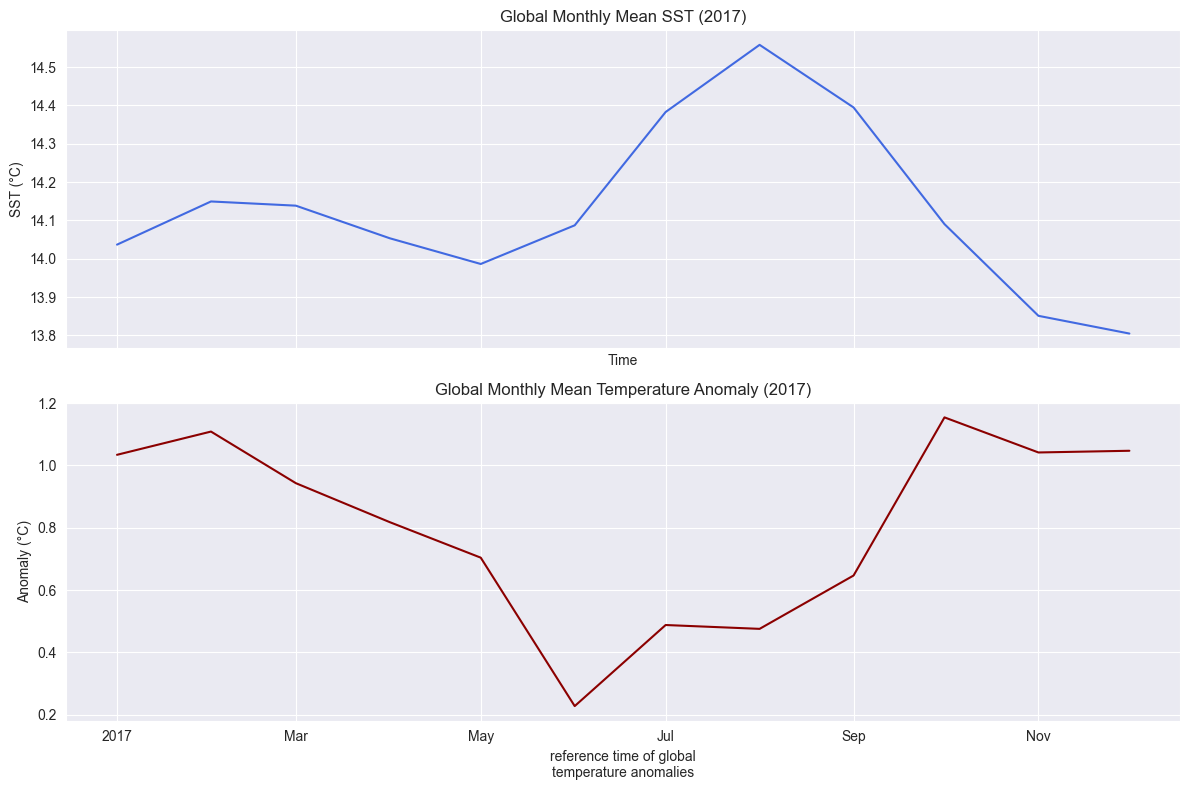

In [7]:
fig, axes = plt.subplots(2, 1, figsize=(12,8), sharex=True)

mean_sst.plot(ax=axes[0], color="royalblue")
axes[0].set_title("Global Monthly Mean SST (2017)")
axes[0].set_ylabel("SST (°C)")

mean_anom.plot(ax=axes[1], color="darkred")
axes[1].set_title("Global Monthly Mean Temperature Anomaly (2017)")
axes[1].set_ylabel("Anomaly (°C)")

plt.tight_layout()
plt.show()


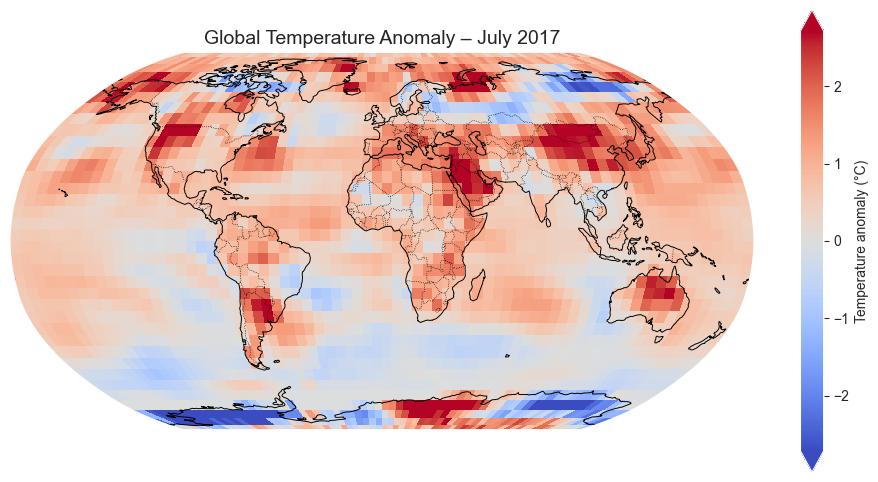

In [8]:
# ds["anom"].sel(time="2017-07").plot(cmap="coolwarm", robust=True, figsize=(10,6))
# plt.title("Temperature anomaly – July 2017")
# plt.show()

# wybór danych dla lipca 2017
anom_2017 = ds_anom["anom"].sel(time="2017-07")

plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.Robinson())  # globalna mapa (Robinson)
ax.set_global()

# dodanie wybrzeży i lądów
ax.add_feature(cfeature.COASTLINE, linewidth=0.7)
ax.add_feature(cfeature.BORDERS, linewidth=0.5, linestyle=":")
ax.add_feature(cfeature.LAND, facecolor="lightgray")

# rysowanie danych
anom_2017.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),   # dane w układzie geograficznym (lat/lon)
    cmap="coolwarm",
    robust=True,
    cbar_kwargs={"label": "Temperature anomaly (°C)"}
)

plt.title("Global Temperature Anomaly – July 2017", fontsize=14)
plt.show()



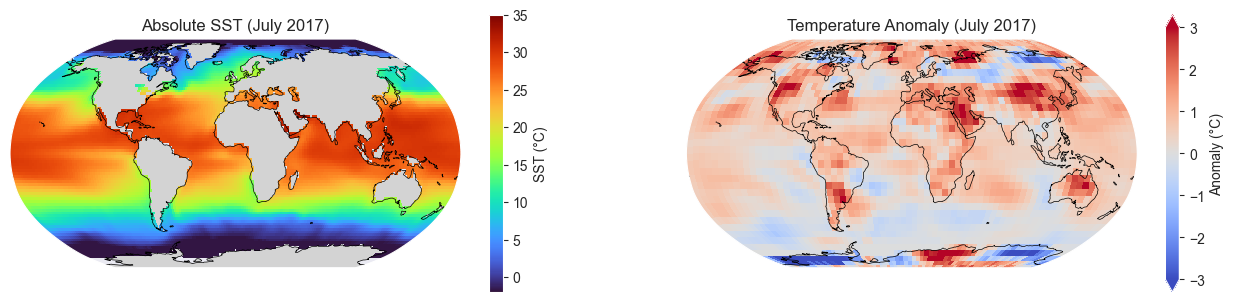

In [9]:
# %% 2) Compare maps – July 2017
sst_july = sst_2017.sel(time="2017-07")
anom_july = anom_2017.sel(time="2017-07")

fig, axes = plt.subplots(1, 2, figsize=(16,6), subplot_kw={"projection": ccrs.Robinson()})

for ax, data, title, cmap, vmin, vmax, label in [
    (axes[0], sst_july, "Absolute SST (July 2017)", "turbo", -2, 35, "SST (°C)"),
    (axes[1], anom_july, "Temperature Anomaly (July 2017)", "coolwarm", -3, 3, "Anomaly (°C)")
]:
    ax.set_global()
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax.add_feature(cfeature.LAND, facecolor="lightgray")
    p = data.plot(
        ax=ax, transform=ccrs.PlateCarree(),
        cmap=cmap, vmin=vmin, vmax=vmax,
        cbar_kwargs={"shrink":0.6, "label": label}
    )
    ax.set_title(title)

## 🌍 Maps: Absolute SST vs Temperature Anomalies (July 2017)

The two maps show **different but complementary views of ocean conditions**:

- **Left: Absolute Sea Surface Temperature (SST)**
  - Warmest waters (~30 °C) are found in the tropics.
  - Cooler waters (<10 °C) dominate at high latitudes.
  - This gives us the *baseline habitat zones* for marine life.

- **Right: Temperature Anomaly (relative to 1971–2000 climate)**
  - Red shades = warmer than normal (+1–3 °C).
  - Blue shades = cooler than normal (–1–3 °C).
  - This shows *where conditions deviated from the long-term norm* in July 2017.

---

## 🔎 Interpretation

- The **SST map** shows the *absolute thermal environment*:
  - Tropics and subtropics are hot spots for biological activity.
  - Polar regions remain cold, restricting plankton and jellyfish presence.

- The **anomaly map** highlights *unusual conditions*:
  - Warmer-than-normal waters in the **North Atlantic, Mediterranean, and western Pacific**.
  - Cooler-than-normal patches near the **Southern Ocean**.

---

## 🪼🐟 Ecological implications (Plankton & Jellyfish)

### Plankton
- Plankton growth depends on temperature: warmer waters accelerate blooms.
- Positive anomalies (+1–2 °C) → **earlier or stronger plankton blooms** in 2017 compared to average.
- Negative anomalies (–1 °C) → possible **delayed growth** in cooler regions.
- This shift can alter the timing of the food chain.

### Jellyfish
- Jellyfish thrive in **warm SST > 26 °C**.
- Large tropical/subtropical zones already suitable in July 2017.
- Positive anomalies indicate regions where **jellyfish could expand beyond their usual range** (e.g. Mediterranean).
- Warmer anomalies may **increase bloom frequency** and extend their season.

---

## 📌 Key takeaway
- **Absolute SST (left map)** shows *where species can survive*.
- **Anomalies (right map)** show *how unusual conditions might shift ecosystems*.
- July 2017 patterns suggest:
  - 🌊 **Earlier and stronger plankton blooms** in warm anomaly regions.
  - 🪼 **Increased risk of jellyfish outbreaks** in warmer-than-normal seas.
  - ⚖️ Possible **mismatch between plankton blooms and fish spawning**, favoring jellyfish over fish.


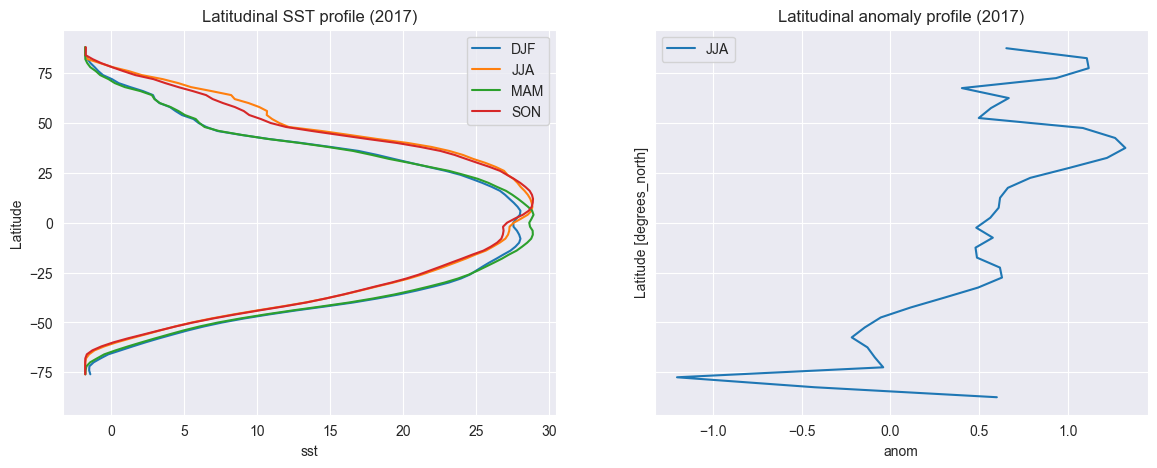

In [10]:
# %% Seasonal profiles – average by latitude bands
sst_lat = sst_2017.groupby("time.season").mean().mean(dim="lon")
anom_lat = anom_2017.groupby("time.season").mean().mean(dim="lon")

fig, axes = plt.subplots(1, 2, figsize=(14,5), sharey=True)

# SST profile
for season in sst_lat.season.values:
    sst_lat.sel(season=season).plot(
        y="lat", ax=axes[0], label=str(season)
    )
axes[0].set_title("Latitudinal SST profile (2017)")
axes[0].set_ylabel("Latitude")
axes[0].legend()

# Anomaly profile
for season in anom_lat.season.values:
    anom_lat.sel(season=season).plot(
        y="lat", ax=axes[1], label=str(season)
    )
axes[1].set_title("Latitudinal anomaly profile (2017)")
axes[1].legend()

plt.show()


# 🌊 Analysis of Latitudinal SST and Anomaly Profiles (2017)

## 🔎 What the plots show

### Left panel: **Latitudinal SST profile (2017)**
- **SST = Sea Surface Temperature**
- **X-axis**: average ocean surface temperature (°C)
- **Y-axis**: latitude (–90° = South Pole, +90° = North Pole)
- Each line is one **season**:
  - **DJF** = December–January–February (Northern Hemisphere winter)
  - **MAM** = March–April–May (spring)
  - **JJA** = June–July–August (summer)
  - **SON** = September–October–November (autumn)

**Interpretation:**
- Highest SST values (~25–30 °C) occur around the **equator** (0° latitude).
- Temperatures decrease toward the poles (<0 °C at ±75° latitude).
- Seasonal differences are strongest in the **Northern Hemisphere**:
  - **JJA** (summer) shows much warmer values in the north compared to DJF (winter).
- The **Southern Hemisphere** shows less seasonal variation, because oceans dominate and buffer temperature changes.

---

### Right panel: **Latitudinal anomaly profile (2017)**
- **Anomaly** = deviation from the long-term climate mean (1971–2000).
- **Positive values (>0)** → warmer than normal.
- **Negative values (<0)** → colder than normal.
- Shown here as seasonal averages along latitude.

**Interpretation:**
- In 2017, most latitudes had **positive anomalies** (~+0.5 to +1 °C).
- Oceans were generally **warmer than the climate baseline**.
- Some southern latitudes show small negative anomalies (colder patches).
- This reflects the influence of **global warming**, since absolute SST follows latitude, but anomalies reveal unusual deviations.

---

## 🌍 Why this matters (plankton & jellyfish context)
- **Plankton blooms** are strongly tied to water temperature.
  - Warmer-than-normal waters may **shift bloom timing** or **geographic range**.
- **Jellyfish** often thrive in **warmer waters**.
  - Positive anomalies may signal areas where jellyfish populations could increase.
- Combining **SST (absolute habitat range)** with **anomalies (climate-driven shifts)** helps identify regions where ecosystems are under **stress or change**.

---

## 📝 Abbreviations
- **SST** → Sea Surface Temperature
- **DJF** → December, January, February (winter in Northern Hemisphere)
- **MAM** → March, April, May (spring)
- **JJA** → June, July, August (summer)
- **SON** → September, October, November (autumn)


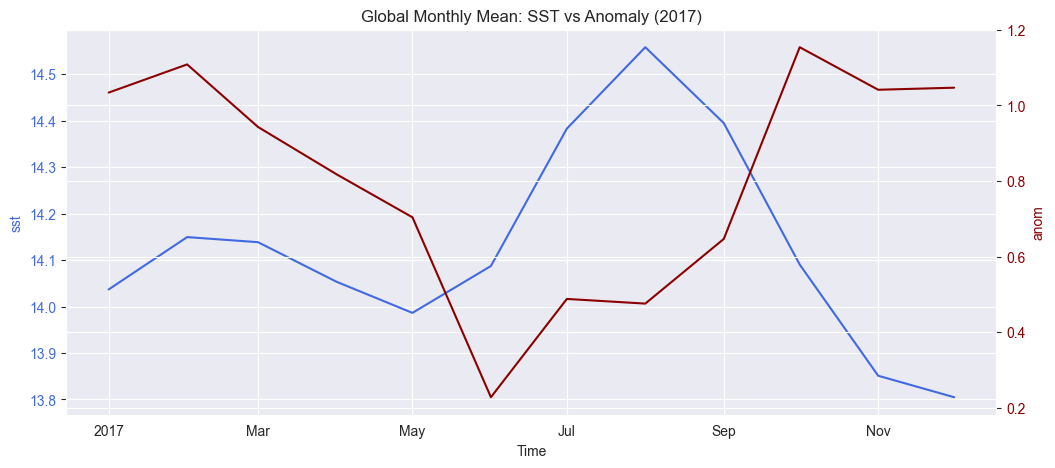

In [14]:
fig, ax1 = plt.subplots(figsize=(12,5))

color = "royalblue"
ax1.set_xlabel("Time (2017)")
ax1.set_ylabel("SST (°C)", color=color)
mean_sst.plot(ax=ax1, color=color)
ax1.tick_params(axis="y", labelcolor=color)

ax2 = ax1.twinx()  # druga oś Y
color = "darkred"
ax2.set_ylabel("Anomaly (°C)", color=color)
mean_anom.plot(ax=ax2, color=color)
ax2.tick_params(axis="y", labelcolor=color)

plt.title("Global Monthly Mean: SST vs Anomaly (2017)")
plt.show()
